# Árvores de decisão e florestas aleatórias em Python

Este é o código aborda os métodos de árvores de decisões em Python. 

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

warn.filterwarnings('ignore')

%matplotlib inline

## Obtendo os dados

In [2]:
# https://www.news-medical.net/health/What-is-Kyphosis-(Portuguese).aspx

#Kyphosis  indica se o método foi eficiente ou não
# Age Idade
# Number Número de vértebras que a criança teve intervenção
# Start Vértebra inicial que o procedimento foi inicial

df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Análisa Exploratória de Dados

Vamos observar um simples pairplot para este pequeno conjunto de dados.

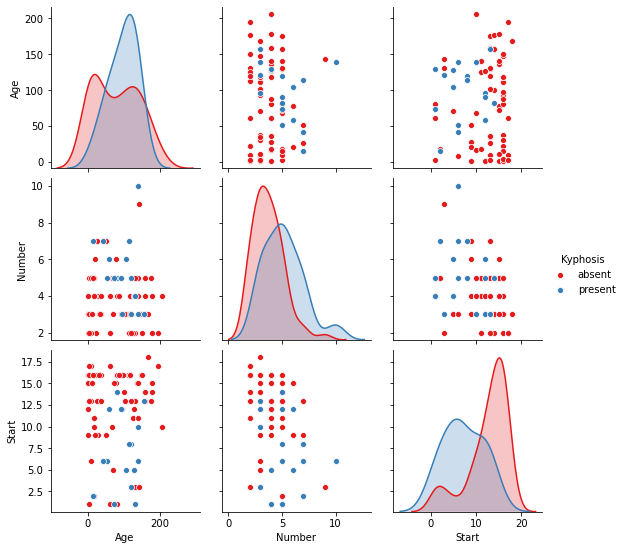

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.86      0.84        21
     present       0.00      0.00      0.00         4

    accuracy                           0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[18  3]
 [ 4  0]]


In [15]:
# Features importantes obtidas por árvore de decisão
colunas_importantes = pd.DataFrame(dtree.feature_importances_.reshape(1,3), columns=X_train.columns)

print('percentual total ',np.sum(dtree.feature_importances_))
colunas_importantes.head()

print(np.max(colunas_importantes).sort_values())


percentual total  1.0
Number    0.145498
Age       0.393090
Start     0.461412
dtype: float64


Text(0.5, 1.0, 'Importância de cada feature')

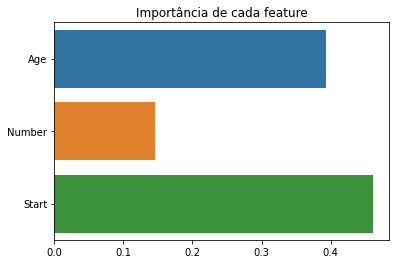

In [16]:
colunas_importantes = pd.Series(data=dtree.feature_importances_, index=X_train.columns)
sns.barplot(x=colunas_importantes, y=colunas_importantes.index, orient='h').set_title('Importância de cada feature')

## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [17]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

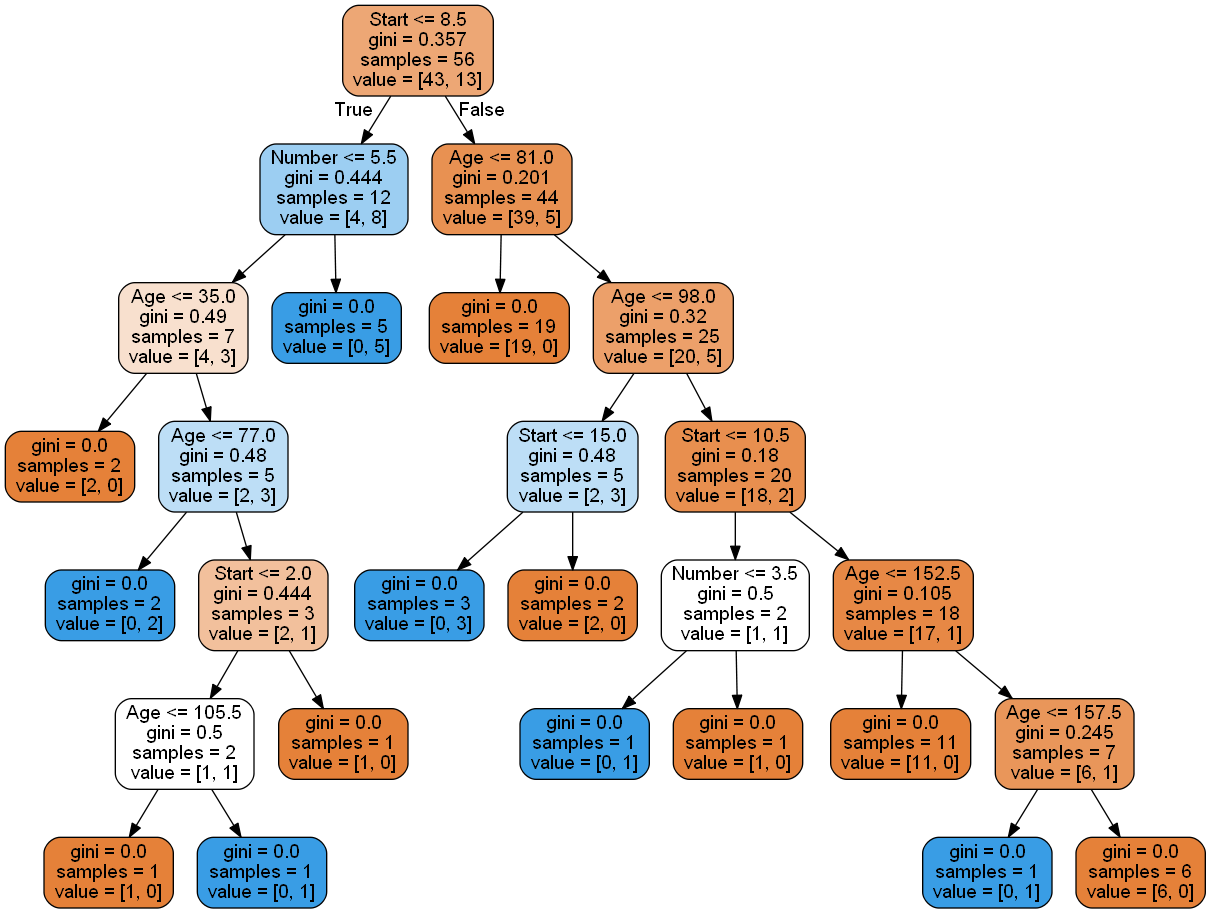

In [18]:
dot_data = export_graphviz(dtree, out_file=None,feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Florestas aleatórias

Agora vamos comparar o modelo da árvore de decisão com uma floresta aleatória.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Features importantes obtidas por random forest
colunas_importantes = pd.DataFrame(rfc.feature_importances_.reshape(1,3), columns=X_train.columns)

print(np.max(colunas_importantes).sort_values())

colunas_importantes.head()

Number    0.228384
Age       0.365747
Start     0.405869
dtype: float64


,Age,Number,Start
0,0.365747,0.228384,0.405869


Text(0.5, 1.0, 'Importância de cada feature')

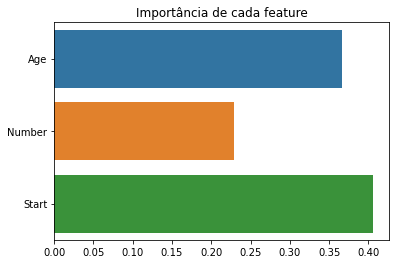

In [21]:
colunas_importantes = pd.Series(data=rfc.feature_importances_, index=X_train.columns)
sns.barplot(x=colunas_importantes, y=colunas_importantes.index, orient='h').set_title('Importância de cada feature')

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test,rfc_pred))

[[19  2]
 [ 2  2]]


In [24]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        21
     present       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



# GradientBoostingClassifier

In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)
print('Acurácia', gb.score(X_test,y_test))
print(classification_report(y_test,gb_predict))


Acurácia 0.84
              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [26]:
# Features importantes obtidas por GradientBoostingClassifier
colunas_importantes = pd.DataFrame(gb.feature_importances_.reshape(1,3), columns=X_train.columns)

print(np.max(colunas_importantes).sort_values())

colunas_importantes.head()

Number    0.172489
Age       0.367531
Start     0.459980
dtype: float64


,Age,Number,Start
0,0.367531,0.172489,0.45998


Text(0.5, 1.0, 'Importância de cada feature')

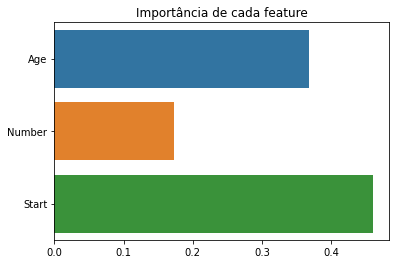

In [27]:
colunas_importantes = pd.Series(data=gb.feature_importances_, index=X_train.columns)
sns.barplot(x=colunas_importantes, y=colunas_importantes.index, orient='h').set_title('Importância de cada feature')

# XGBoost

In [28]:
#https://www.kdnuggets.com/2019/05/xgboost-algorithm.html
#!pip install xgboost
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
print('Acurácia', xgb.score(X_test,y_test))
print(classification_report(y_test,xgb_predict))

Acurácia 0.88
              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



In [29]:
# Features importantes obtidas por XGBoost
colunas_importantes = pd.DataFrame(xgb.feature_importances_.reshape(1,3), columns=X_train.columns)

print(np.max(colunas_importantes).sort_values())

colunas_importantes.head()

Age       0.199578
Number    0.279392
Start     0.521030
dtype: float32


,Age,Number,Start
0,0.199578,0.279392,0.52103


Text(0.5, 1.0, 'Importância de cada feature')

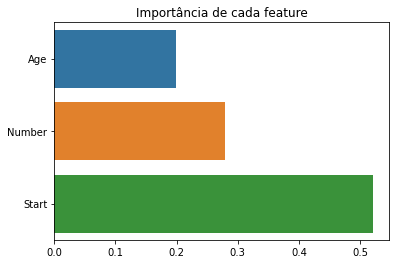

In [31]:
colunas_importantes = pd.Series(data=xgb.feature_importances_, index=X_train.columns)
sns.barplot(x=colunas_importantes, y=colunas_importantes.index, orient='h').set_title('Importância de cada feature')